# Homework #8: Computational
*All computations should be done in this notebook using the R kernel. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work.*

#### You will be required to submit this notebook, fully compiled with your solutions, as an HTML or ipynb file to Canvas by midnight on Friday, April 13.

## Problem 1

Let $X$ be the number of heads in $n = 30$ tosses of a coin. Denote the probability of heads as $p$. We hope to test whether the coin is biased toward heads. 

#### (a) Explicitly write out the null and alternative hypotheses.


null: p <= 0.5
alternate: p > 0.5

#### (b) Define the rejection region to be  $X \ge 20$.  Calculate the rate of type I error. (**For this part, and all remaining parts, calculate probabilities exactly, i.e., without using the normal approximation**)


In [20]:
x = matrix(ncol=1, nrow=10000)
for (i in c(0:10000)) {
    sample = sample(c(0:30), size=1, replace=FALSE)
    x[i] = sample
}
cutoff = x[x >= 20]
length(cutoff)/length(x)

[1] 0.3531

#### (c)  Simulate a dataset (or a summary of a dataset) under the null hypothesis, and test your hypotheses from part (a). State your conclusion. Is your conclusion in error? If so, which type?


In [39]:
x = matrix(ncol=1, nrow=10000)
for (i in c(0:10000)) {
    x[i] = rbinom(n=1, size=30, prob=0.5)
}
cutoff = x[x >= 20]
length(cutoff)/length(x)

"I conclude that some variations in the data set support the alternate hypothesis that X >= 20 heads in 30 coin flips"

length(cutoff)/length(x) 
"is less than 5% so it rejects the null hypothesis a signifigance of 5%,"

[1] 0.0499

[1] "I conclude that some variations in the data set support the alternate hypothesis that X >= 20 heads in 30 coin flips"

[1] 0.0499

[1] "is less than 5% so it rejects the null hypothesis a signifigance of 5%,"

#### (d) Construct a grid of values for $p$ under the alternative hypothesis. For each value of $p$ in this grid, calculate the power of this test (remember that statistical power is the probability of rejecting the null hypothesis while the alternative hypothesis is true). Make a plot of the power ($y$-axis) vs $p$ ($x$-axis). Interpret/comment on this plot. In particular, as $p$ gets further from the $p$ specified under the null hypothesis, what happens to the power?


[1] "This is an inverse normal distribution. As p gets further from p in the null hypothesis, the power increases"

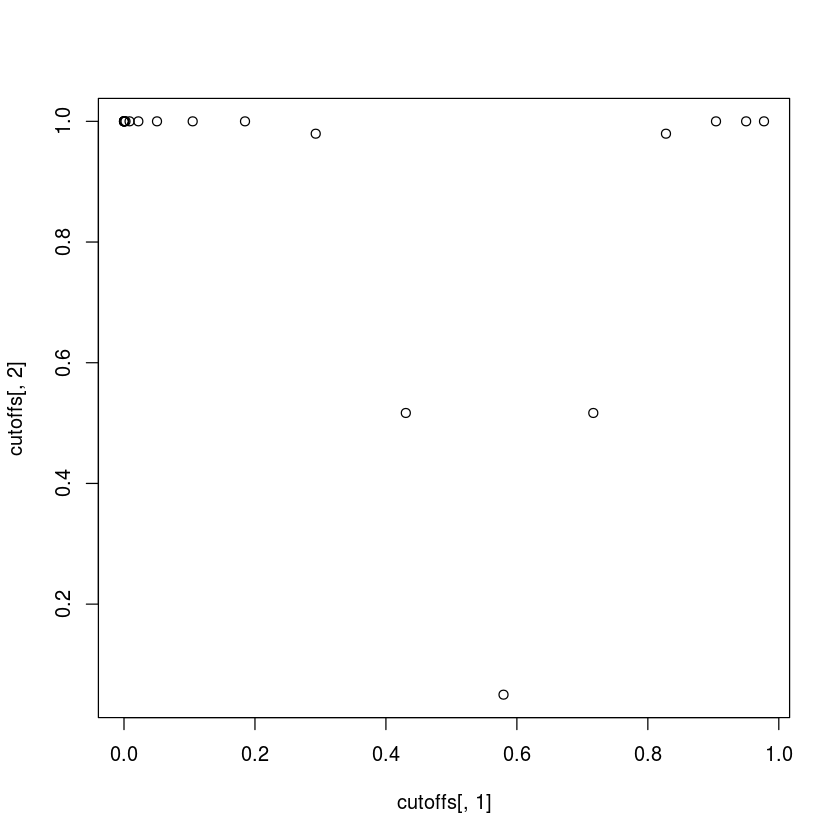

In [72]:
cutoffs = matrix(ncol=2, nrow=20) 
s = sd(x)
a = 15
n = 30
error = qnorm(0.975)*s/sqrt(n)
left = a - error
right = a + error


for (i in c(0:20)) {
    cutoffs[i,1] = length(x[x <= i])/length(x)
    assumed = a + (i - 15)
    Zleft = (left - assumed)/(s/sqrt(n))
    Zright = (right - assumed)/(s/sqrt(n))
    p = pnorm(Zright) - pnorm(Zleft)
    cutoffs[i,2] = 1-p
}

plot(cutoffs[,1], cutoffs[,2])
"This is an inverse normal distribution. As p gets further from p in the null hypothesis, the power increases"

## Problem 2

Consider the test $H_0: p \le 0.5$ vs $H_1: p > 0.5$, where $p$ is a population proportion. Let $\alpha = 0.05$ and let $n$, the sample size, be 200.

#### (a) Simulate $m = 100,000$ datasets where the true population proportion is $p = 0.5$. Calculate the p-value for the test above for each dataset. Print a histogram of these p-values. Comment on the distribution.



[1] "This data follows a normal distribution peaking in the middle"

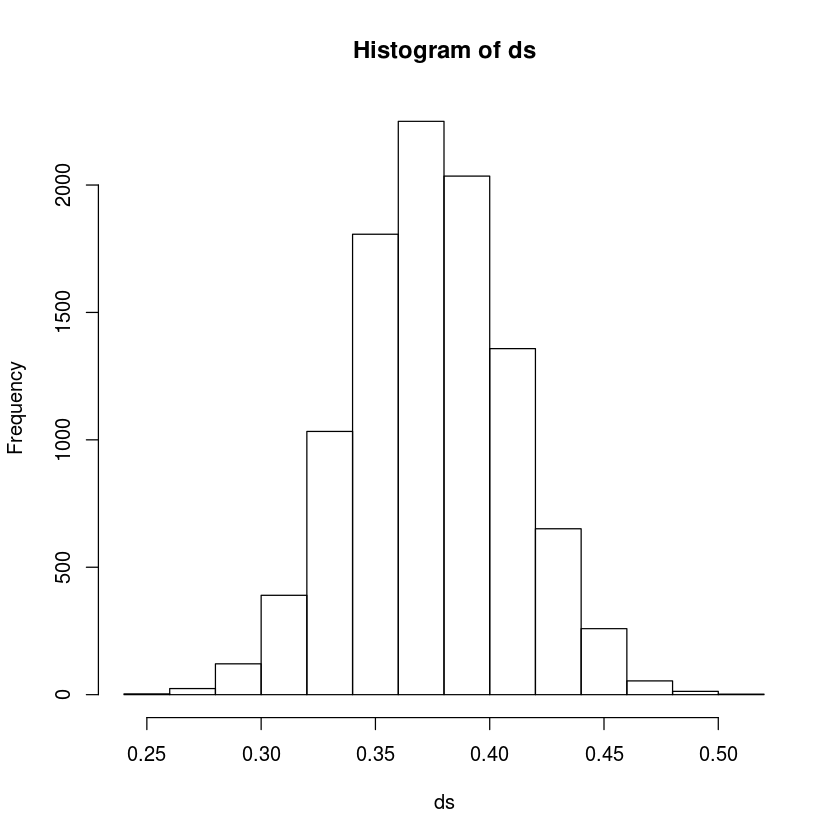

In [99]:
ds = matrix(ncol=1, nrow=10000)

for (i in c(0:10000)) {
    x = matrix(ncol=1, nrow=200)
    for (j in c(0:200)) {
        x[j] = rbinom(n=1, size=10, prob=0.5)
    }
    cutoff = x[x > 5]
    ds[i] = length(cutoff)/length(x)
}

hist(ds)
"This data follows a normal distribution peaking in the middle"

#### (b)  Use part (a) to show that the probability of type I error is (approximately) equal to $\alpha$ (use the rule that rejects $H_0$ if the p-value is less than $\alpha$). 


In [103]:
length(ds[ds >= .5])/length(ds)
"= about 0.05"


[1] 3e-04

[1] "= about 0.05"

#### (c) Considering the same test, simulate $m = 100,000$ datasets where the true population proportion is $p = 0.6$. Calculate the p-value for each sample. Print a histogram of these p-values. Comment on the distribution.


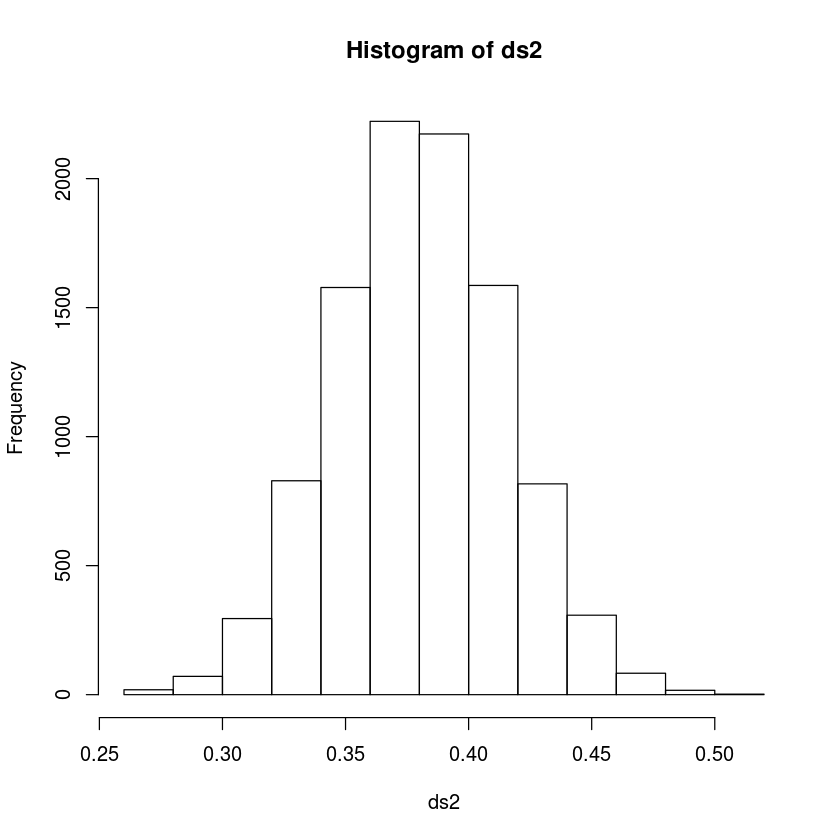

In [107]:
ds2 = matrix(ncol=1, nrow=10000)

for (i in c(0:10000)) {
    x = matrix(ncol=1, nrow=200)
    for (j in c(0:200)) {
        x[j] = rbinom(n=1, size=10, prob=0.6)
    }
    x[i]
    cutoff = x[x > 6]
    ds2[i] = length(cutoff)/length(x)
}

hist(ds2)

In [91]:
"The distribution follows the same normal shape, but is moved to the left, with a slightly lower mean"

[1] "The distribution follows the same normal shape, but is moved to the left, with a slightly lower mean"

#### (d) What is the percentage of p-values (from part (c)) that are greater than $\alpha$? What is the rate of type II error?


In [114]:
x = matrix(ncol=1, nrow=10000)
for (i in c(0:10000)) {
    x[i] = rbinom(n=1, size=10, prob=0.6)
}

s = sd(x)
a = 6
n = 10
error = qnorm(0.95)*s/sqrt(n)
left = a - error
right = a + error


assumed = a + 1.5
Zleft = (left - assumed)/(s/sqrt(n))
Zright = (right - assumed)/(s/sqrt(n))
p = pnorm(Zright) - pnorm(Zleft)
p

[1] 0.079505

#### (e) Calculate the power of this test.


In [115]:
1-p

[1] 0.920495

#### (f) Now suppose that the true population proportion is $p = 0.7$. How do you expect the power of this test to change? Write code to verify your expectation.


In [122]:
"I expect the power to increase as the population proportion increases"

x = matrix(ncol=1, nrow=10000)
for (i in c(0:10000)) {
    x[i] = rbinom(n=1, size=10, prob=0.7)
}

s = sd(x)
a = 6
n = 10
error = qnorm(0.95)*s/sqrt(n)
left = a - error
right = a + error


assumed = a + 1.5
Zleft = (left - assumed)/(s/sqrt(n))
Zright = (right - assumed)/(s/sqrt(n))
p2 = pnorm(Zright) - pnorm(Zleft)

1-p
"vs."
1-p2

[1] "I expect the power to increase as the population proportion increases"

[1] 0.920495

[1] "vs."

[1] 0.9478222